# 02. Polynomial Regression

**Author:** [Your Name/GitHub Username]
**Date:** June 2, 2025 (Or current date)

## Introduction

Polynomial Regression is a type of regression analysis where the relationship between the independent variable `x` and the dependent variable `y` is modeled as an $n^{th}$ degree polynomial in `x`. While it models non-linear relationships, it's still considered a special case of **multiple linear regression** because it's linear in terms of its coefficients.

* **Type:** Supervised Learning
* **Task:** Regression
* **Goal:** To fit a polynomial equation to the data, allowing for curves rather than just straight lines.

## Theoretical Background

### Key Concepts

If we have one independent variable `x`, the polynomial regression equation of degree `n` is:
$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \dots + \theta_n x^n + \epsilon$

Where:
* $y$ is the dependent variable.
* $x$ is the independent variable.
* $x^2, x^3, \dots, x^n$ are the polynomial terms (which are treated as new features).
* $\theta_0, \theta_1, \dots, \theta_n$ are the regression coefficients.
* $\epsilon$ is the error term.

Even though the relationship between $y$ and $x$ is non-linear, the equation is *linear in terms of the coefficients* $\theta_i$. We can transform the original feature `x` into a new set of features: $x_1 = x, x_2 = x^2, \dots, x_n = x^n$. Then the model becomes:
$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n + \epsilon$
This is a standard multiple linear regression problem.

* **Degree of Polynomial:** This is a crucial hyperparameter.
    * A low degree (e.g., 1) results in a simple model (like linear regression) which might **underfit** if the data is complex.
    * A high degree can fit the training data very well but might **overfit**, meaning it performs poorly on unseen data because it captures noise.
* **`PolynomialFeatures` from Scikit-learn:** This transformer is used to generate the polynomial and interaction features.

### Assumptions
Polynomial regression shares many assumptions with linear regression, applied to the transformed features:
1.  **Linearity (in parameters):** Assumed by the model structure.
2.  **Independence of errors:** Residuals should be independent.
3.  **Homoscedasticity:** Residuals should have constant variance.
4.  **Normality of errors:** Residuals should be normally distributed.

### Pros
* Can model non-linear relationships.
* Flexible: Can fit a wide range of curvatures.
* Still relatively simple to understand and implement as an extension of linear regression.

### Cons
* Prone to overfitting with high-degree polynomials.
* Choosing the right degree can be challenging.
* Can be sensitive to outliers, especially with higher degrees.
* Extrapolation (predicting outside the range of training data) can be very unreliable.

### Common Use Cases
* Modeling phenomena where the rate of change is not constant (e.g., growth rates, acceleration).
* Analyzing the trajectory of objects.
* Understanding dose-response relationships in biology/medicine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Set a style for seaborn plots
sns.set_style('whitegrid')

## Implementation with Python

We will generate synthetic data that has a non-linear (quadratic) relationship to demonstrate Polynomial Regression.

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate non-linear data (e.g., quadratic relationship)
m = 100  # number of samples
X = 6 * np.random.rand(m, 1) - 3  # X values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5*X^2 + X + 2 + noise

# Convert to Pandas DataFrame/Series for easier handling
X_df = pd.DataFrame(X, columns=['Feature'])
y_s = pd.Series(y.ravel(), name='Target') # .ravel() to make y a 1D array

# Display the first few rows
print("Features (X):")
print(X_df.head())
print("\nTarget (y):")
print(y_s.head())

# Basic statistics
print("\nFeatures Description:")
print(X_df.describe())
print("\nTarget Description:")
print(y_s.describe())

Features (X):
    Feature
0 -0.752759
1  2.704286
2  1.391964
3  0.591951
4 -2.063888

Target (y):
0    1.617611
1    8.061859
2    4.452506
3    0.779585
4    1.846257
Name: Target, dtype: float64

Features Description:
          Feature
count  100.000000
mean    -0.178916
std      1.784936
min     -2.966867
25%     -1.840795
50%     -0.215145
75%      1.381219
max      2.921322

Target Description:
count    100.000000
mean       3.413079
std        2.307071
min        0.068395
25%        1.753040
50%        2.926807
75%        4.475250
max        9.970204
Name: Target, dtype: float64


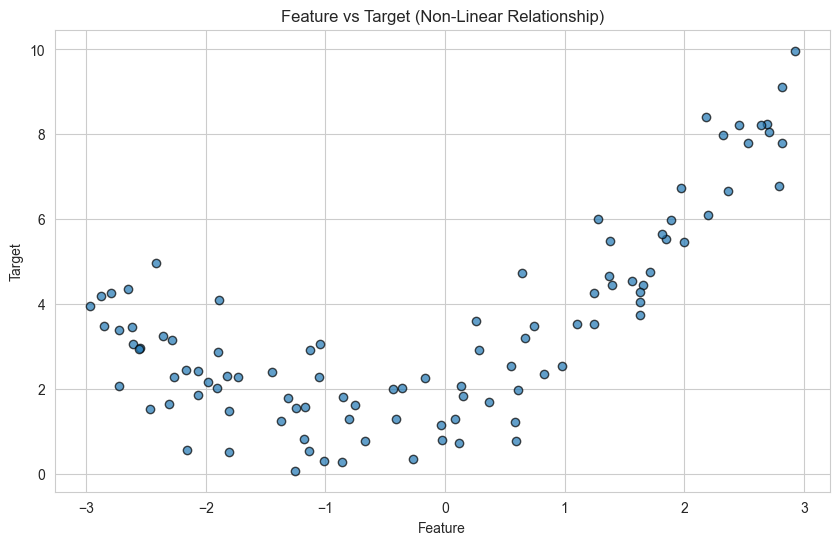

In [3]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X_df['Feature'], y_s, alpha=0.7, edgecolors='k')
plt.title('Feature vs Target (Non-Linear Relationship)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

The scatter plot clearly shows a non-linear, curved relationship (parabolic in this case), indicating that a simple linear regression model would not fit well.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_s, test_size=0.2, random_state=42)

print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")

# --- Polynomial Feature Transformation ---
degree = 2 # We know the underlying data is quadratic, so degree 2 should be good.

# Initialize PolynomialFeatures transformer
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
# include_bias=False because LinearRegression will handle the intercept.

# Fit and transform the training features
X_train_poly = poly_features.fit_transform(X_train)

# Transform the test features (only transform, do not fit again)
X_test_poly = poly_features.transform(X_test)

print(f"\nShape of original training features: {X_train.shape}")
print(f"Shape of polynomial training features (degree {degree}): {X_train_poly.shape}")
print(f"Feature names from PolynomialFeatures: {poly_features.get_feature_names_out(['Feature'])}")

# Note: If scaling is needed, it should generally be done AFTER polynomial transformation.
# For this example with features on a similar scale and low degree, it might not be critical.

Training set size: X_train: (80, 1), y_train: (80,)
Testing set size: X_test: (20, 1), y_test: (20,)

Shape of original training features: (80, 1)
Shape of polynomial training features (degree 2): (80, 2)
Feature names from PolynomialFeatures: ['Feature' 'Feature^2']


In [5]:
# Create a Linear Regression model instance
# This model will be trained on the polynomial features
poly_reg_model = LinearRegression()

# Fit the model to the polynomial training data
poly_reg_model.fit(X_train_poly, y_train)

print("Polynomial Regression model training completed.")

# Display coefficients
print(f"\nIntercept (θ0): {poly_reg_model.intercept_:.2f}")
print(f"Coefficients (θ1, θ2, ...): {np.round(poly_reg_model.coef_, 2)}")
# Expected coefficients from our data generation: 0.5*X^2 + 1*X + 2
# So, θ0 ~ 2, θ1 (for X) ~ 1, θ2 (for X^2) ~ 0.5

Polynomial Regression model training completed.

Intercept (θ0): 1.74
Coefficients (θ1, θ2, ...): [0.94 0.57]


In [6]:
# Make predictions on the polynomial test set
y_poly_pred = poly_reg_model.predict(X_test_poly)

# Display some predictions vs actual values
poly_predictions_df = pd.DataFrame({'Actual Target': y_test, 'Predicted Target (Poly)': y_poly_pred})
print("\nActual vs Predicted values (Polynomial Regression - first 5):")
print(poly_predictions_df.head())


Actual vs Predicted values (Polynomial Regression - first 5):
    Actual Target  Predicted Target (Poly)
83       3.466567                 3.157166
53       6.671484                 7.153308
70       3.730628                 4.789955
45       2.541189                 3.195065
44       2.391080                 1.559916


In [7]:
# Evaluate the Polynomial Regression model
mae_poly = metrics.mean_absolute_error(y_test, y_poly_pred)
mse_poly = metrics.mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = metrics.r2_score(y_test, y_poly_pred)

print("\nPolynomial Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.2f}")


Polynomial Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.64
Root Mean Squared Error (RMSE): 0.80
R-squared (R²): 0.86


### For Comparison: Simple Linear Regression on the Same Data
Let's see how a simple linear regression model performs on this non-linear data.

In [8]:
# Train a simple Linear Regression model
simple_lin_reg_model = LinearRegression()
simple_lin_reg_model.fit(X_train, y_train) # Using original X_train

# Predictions
y_simple_lin_pred = simple_lin_reg_model.predict(X_test)

# Evaluate
mae_simple = metrics.mean_absolute_error(y_test, y_simple_lin_pred)
mse_simple = metrics.mean_squared_error(y_test, y_simple_lin_pred)
rmse_simple = np.sqrt(mse_simple)
r2_simple = metrics.r2_score(y_test, y_simple_lin_pred)

print("\nSimple Linear Regression Model Evaluation Metrics (on non-linear data):")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.2f}")
print(f"R-squared (R²): {r2_simple:.2f}")

print(f"\nImprovement with Polynomial Regression (R²): {r2_poly - r2_simple:.2f}")


Simple Linear Regression Model Evaluation Metrics (on non-linear data):
Mean Absolute Error (MAE): 1.33
Mean Squared Error (MSE): 2.53
Root Mean Squared Error (RMSE): 1.59
R-squared (R²): 0.43

Improvement with Polynomial Regression (R²): 0.43


/opt/anaconda3/envs/ml_explorer/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_explorer/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


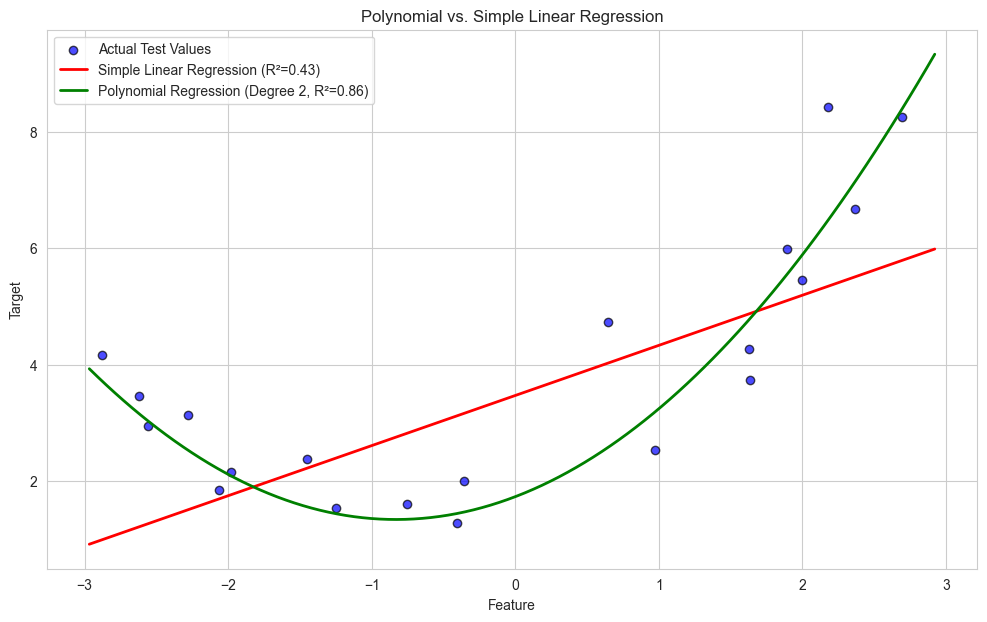

In [9]:
# Generate predictions across the range of X for plotting the curve
X_plot = np.linspace(X_df['Feature'].min(), X_df['Feature'].max(), 100).reshape(-1, 1)

# Simple Linear Regression line
y_plot_simple_lin = simple_lin_reg_model.predict(X_plot)

# Polynomial Regression curve
X_plot_poly = poly_features.transform(X_plot) # Use the SAME poly_features transformer
y_plot_poly = poly_reg_model.predict(X_plot_poly)


plt.figure(figsize=(12, 7))
plt.scatter(X_test['Feature'], y_test, color='blue', label='Actual Test Values', alpha=0.7, edgecolors='k')
plt.plot(X_plot, y_plot_simple_lin, color='red', linewidth=2, label=f'Simple Linear Regression (R²={r2_simple:.2f})')
plt.plot(X_plot, y_plot_poly, color='green', linewidth=2, label=f'Polynomial Regression (Degree {degree}, R²={r2_poly:.2f})')

plt.title('Polynomial vs. Simple Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## Choosing the Degree: Impact of Overfitting & Underfitting

The choice of polynomial degree is critical.
* **Underfitting (Low Degree):** If the degree is too low, the model cannot capture the complexity of the data (e.g., fitting a line to a curve).
* **Overfitting (High Degree):** If the degree is too high, the model can fit the training data noise perfectly but will generalize poorly to new, unseen data.

Let's visualize this with different degrees.

/opt/anaconda3/envs/ml_explorer/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_explorer/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_explorer/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


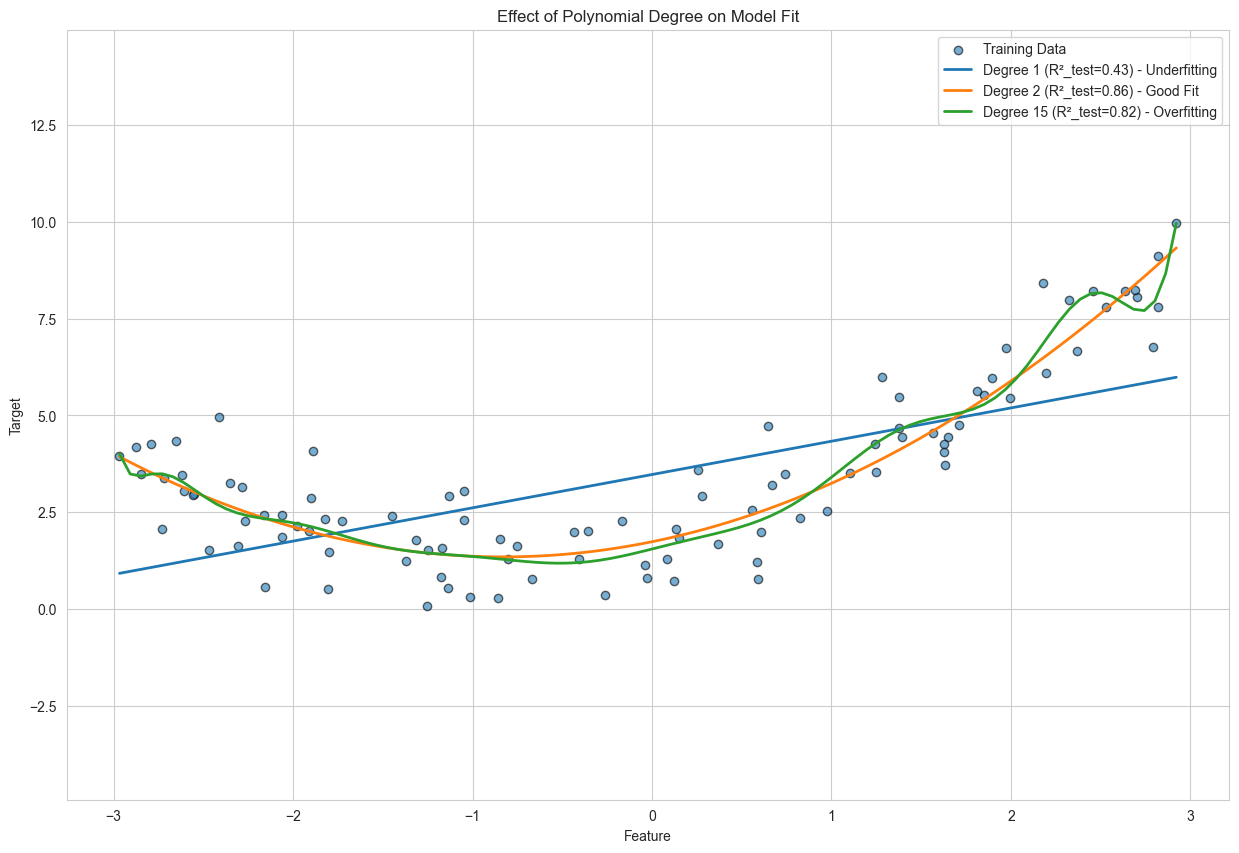

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(X_df['Feature'], y_s, label='Training Data', alpha=0.6, edgecolors='k')

degrees_to_test = [1, 2, 15] # Underfit, Good fit (for our data), Overfit

for i, degree_val in enumerate(degrees_to_test):
    # Create pipeline for polynomial features and linear regression
    model_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree_val, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    model_pipeline.fit(X_train, y_train) # Fit on original training data
    
    # Generate predictions for plotting
    y_plot_values = model_pipeline.predict(X_plot)
    
    # Calculate R2 on test set for this degree
    y_test_pred_pipeline = model_pipeline.predict(X_test)
    r2_val = metrics.r2_score(y_test, y_test_pred_pipeline)

    label_text = f'Degree {degree_val} (R²_test={r2_val:.2f})'
    if degree_val == 1:
        label_text += " - Underfitting"
    elif degree_val == 15: # Example of high degree
        label_text += " - Overfitting"
    else: # Our degree 2
        label_text += " - Good Fit"
        
    plt.plot(X_plot, y_plot_values, linewidth=2, label=label_text)

plt.title('Effect of Polynomial Degree on Model Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.ylim(y_s.min() - 5, y_s.max() + 5) # Adjust y-limits for better visualization
plt.show()

As seen in the plot:
* **Degree 1 (Underfitting):** The linear model fails to capture the curve in the data.
* **Degree 2 (Good Fit):** This model (which matches our synthetic data's true nature) fits well.
* **Degree 15 (Overfitting):** The model tries to pass through or very close to many training points by making extreme oscillations. While it might have a high R² on the *training* set (not shown here), its R² on the *test* set is likely poor, and it would not generalize well. Note how the R² on the test set for degree 15 might even be worse than for degree 2.

In practice, techniques like cross-validation are used to select an appropriate degree that balances bias and variance. Visualizing learning curves (training error vs. validation error for different model complexities) can also be very insightful.

### Using `Pipeline` for a Cleaner Workflow

Scikit-learn's `Pipeline` object can simplify the process of chaining transformers (like `PolynomialFeatures`) and estimators (like `LinearRegression`).

In [11]:
 # Example of using Pipeline for degree 2
degree_pipeline = 2

polynomial_regression_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree_pipeline, include_bias=False)),
    ("lin_reg", LinearRegression())
])

# Fit the entire pipeline on the original training data
polynomial_regression_pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
y_pipeline_pred = polynomial_regression_pipeline.predict(X_test)

# Evaluate
r2_pipeline = metrics.r2_score(y_test, y_pipeline_pred)
print(f"R-squared using Pipeline (Degree {degree_pipeline}): {r2_pipeline:.2f}")
print(f"(This should be very close to the R² obtained manually: {r2_poly:.2f})")

# The pipeline handles the fit_transform on train and transform on test internally.

R-squared using Pipeline (Degree 2): 0.86
(This should be very close to the R² obtained manually: 0.86)


## Conclusion & Key Takeaways

* Polynomial Regression allows us to model non-linear relationships by transforming input features into polynomial terms and then applying linear regression.
* The `PolynomialFeatures` transformer from Scikit-learn is essential for this transformation.
* The degree of the polynomial is a critical hyperparameter:
    * Too low can lead to underfitting.
    * Too high can lead to overfitting.
* Polynomial Regression is still considered a linear model because it's linear in its coefficients.
* Comparing performance against a simple linear model highlights the benefits of polynomial terms when the underlying data relationship is non-linear.
* Using `Pipeline` can make the workflow cleaner and less error-prone.

## Further Reading/References (Optional)

* [Scikit-learn PolynomialFeatures Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* [Scikit-learn Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* Chapter on Polynomial Regression in most Machine Learning textbooks (e.g., "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" by Aurélien Géron).